# 회귀

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w0=6) 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X+np.random.randn(100, 1)

In [6]:
X

array([[1.09762701],
       [1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ],
       [1.29178823],
       [0.87517442],
       [1.783546  ],
       [1.92732552],
       [0.76688304],
       [1.58345008],
       [1.05778984],
       [1.13608912],
       [1.85119328],
       [0.14207212],
       [0.1742586 ],
       [0.04043679],
       [1.66523969],
       [1.5563135 ],
       [1.7400243 ],
       [1.95723668],
       [1.59831713],
       [0.92295872],
       [1.56105835],
       [0.23654885],
       [1.27984204],
       [0.28670657],
       [1.88933783],
       [1.04369664],
       [0.82932388],
       [0.52911122],
       [1.54846738],
       [0.91230066],
       [1.1368679 ],
       [0.0375796 ],
       [1.23527099],
       [1.22419145],
       [1.23386799],
       [1.88749616],
       [1.3636406 ],
       [0.7190158 ],
       [0.87406391],
       [1.39526239],
       [0.12045094],
       [1.33353343],
       [1.34127574],
       [0.42076512],
       [0.257

In [7]:
y

array([[ 9.22535819],
       [12.62234142],
       [11.28776945],
       [ 8.82282178],
       [10.87749059],
       [13.06304208],
       [10.67947726],
       [12.95425917],
       [12.63854946],
       [10.12198388],
       [11.93062336],
       [11.45360443],
       [10.75263147],
       [14.38141214],
       [ 6.92465486],
       [ 7.40360757],
       [ 6.1722472 ],
       [14.44682926],
       [12.3521661 ],
       [13.36208655],
       [15.71209743],
       [11.04550945],
       [ 8.4213499 ],
       [13.21363012],
       [ 5.773072  ],
       [13.06298936],
       [ 6.73320732],
       [12.80989652],
       [12.0977286 ],
       [10.79781031],
       [ 9.98400386],
       [13.09991417],
       [ 8.78797697],
       [12.45753654],
       [ 5.88231503],
       [11.74354037],
       [11.84401775],
       [10.78046188],
       [14.164064  ],
       [12.37676906],
       [ 9.25248874],
       [ 8.39685484],
       [11.87928774],
       [ 7.80818967],
       [10.63956586],
       [11

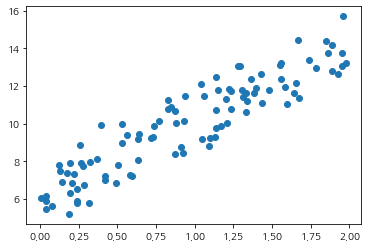

In [8]:
# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

### 비용함수 정의

In [16]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

In [17]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [18]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates()호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [20]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1 : {:.3f} w0 : {:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost : {:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.022 w0 : 6.162
Gradient Descent Total Cost : 0.9935


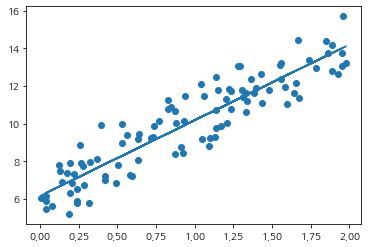

In [21]:
plt.scatter(X, y)
plt.plot(X, y_pred)

### 확률적 경사 하강법

In [27]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 1000000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 batch_size 만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0
        

In [38]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0,0],3), '\nw0:', round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Total Cost:{:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 
w0: 6.156
Stochastic Gradient Total Cost:0.9937
